# N Dimensional Plots

#### Imports

In [65]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

#### Get Data

In [66]:
df_original = pd.read_csv('data/Diabetes.csv')

In [67]:
df_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Get rid of `0`'s in all columns instead of `outcome` and `Pregnancies`

In [68]:
cols = [c for c in df_original.columns if c not in ['Pregnancies', 'Outcome']]

In [69]:
df = df_original.copy()

In [70]:
df[cols] = df[cols].replace({0: np.NaN})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [72]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Scatter Matrix

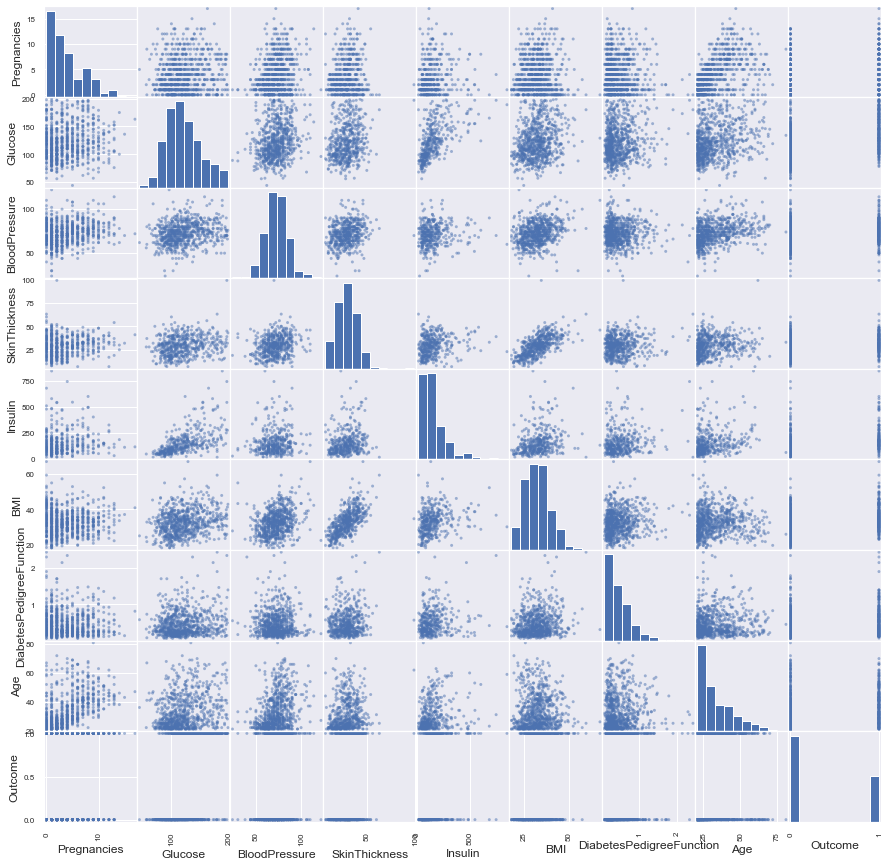

In [73]:
pd.plotting.scatter_matrix(df, figsize=(15, 15));

#### See the data split by outcome

In [74]:
df2 = df.dropna()

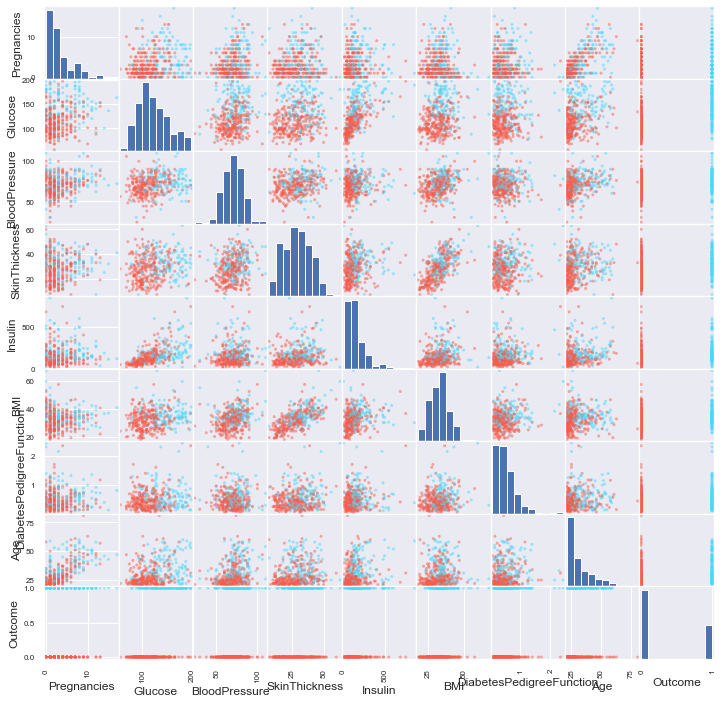

In [75]:
colors = df2["Outcome"].map(lambda x: "#44d9ff" if x == 1 else "#f95b4a")
pd.plotting.scatter_matrix(df2, figsize=(12, 12), color=colors);

# Correlation Plots

In [32]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


# Seaborn Heatmap

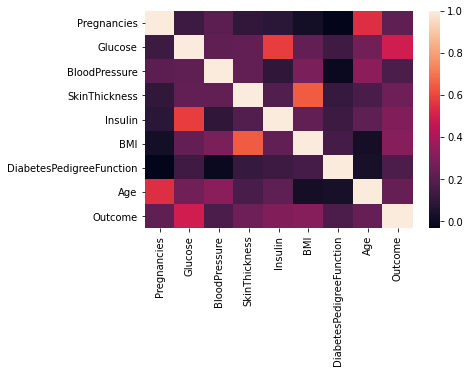

In [34]:
sb.heatmap(df.corr());

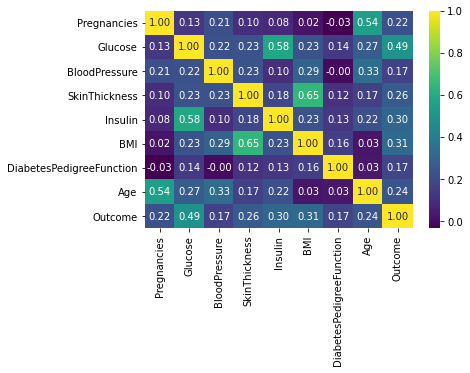

In [36]:
sb.heatmap(df.corr(), annot=True, cmap='viridis', fmt="0.2f");

# 2D Histograms

In [38]:
df2 = pd.read_csv("data/height_weight.csv")
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4231 non-null   int64  
 1   height  4231 non-null   float64
 2   weight  4231 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 99.3 KB


,sex,height,weight
count,4231.000000,4231.000000,4231.000000
mean,1.540061,66.903607,174.095122
std,0.498451,4.313004,38.896171
min,1.000000,55.400000,96.590000
25%,1.000000,63.730000,144.315000
50%,2.000000,66.630000,170.100000
75%,2.000000,69.970000,198.660000
max,2.000000,79.610000,298.440000


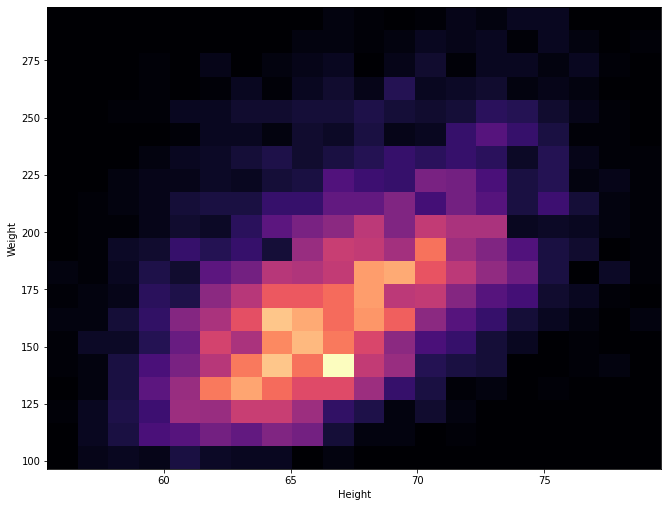

In [42]:
plt.figure(figsize=(11.0, 8.5))
plt.hist2d(df2['height'], df2['weight'], bins=20, cmap='magma')
plt.xlabel('Height')
plt.ylabel('Weight');

# Contour Plots

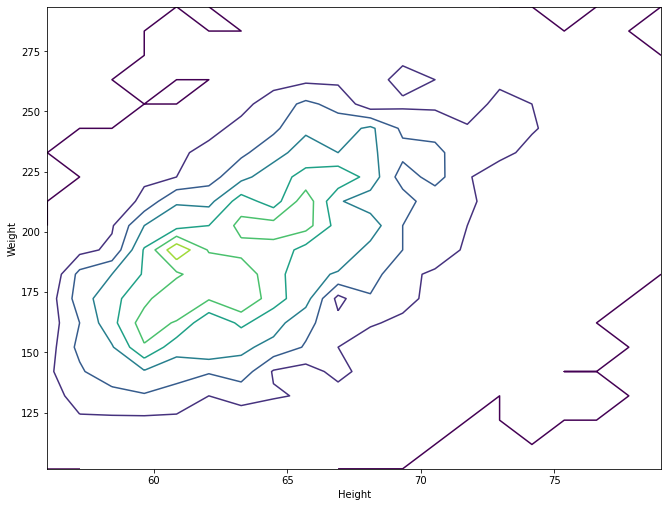

In [44]:
hist, x_edge, y_edge = np.histogram2d(df2["height"], df2["weight"], bins=20)
# Get bin centers
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

plt.figure(figsize=(11.0,8.5))
plt.contour(x_center, y_center, hist)
plt.xlabel('Height')
plt.ylabel('Weight');

#### This is not smooth, mostly due to small dataset

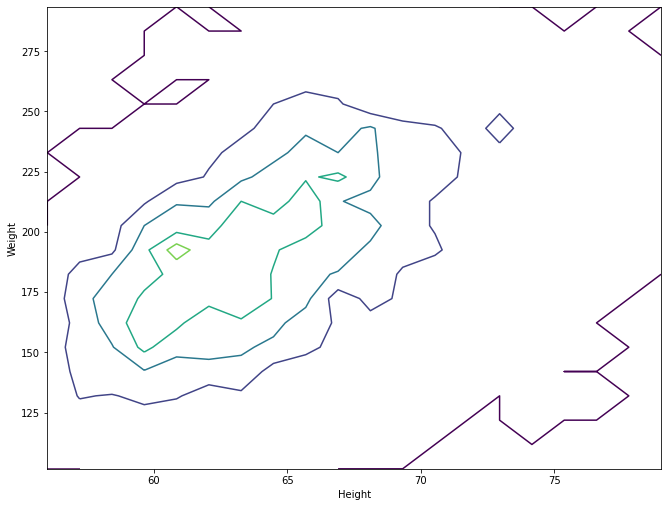

In [45]:
# Ask matplot lob to 
hist, x_edge, y_edge = np.histogram2d(df2["height"], df2["weight"], bins=20)
# Get bin centers
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

plt.figure(figsize=(11.0,8.5))
plt.contour(x_center, y_center, hist, levels=4)
plt.xlabel('Height')
plt.ylabel('Weight');

#### Or get contours based on how many datapoints are inside

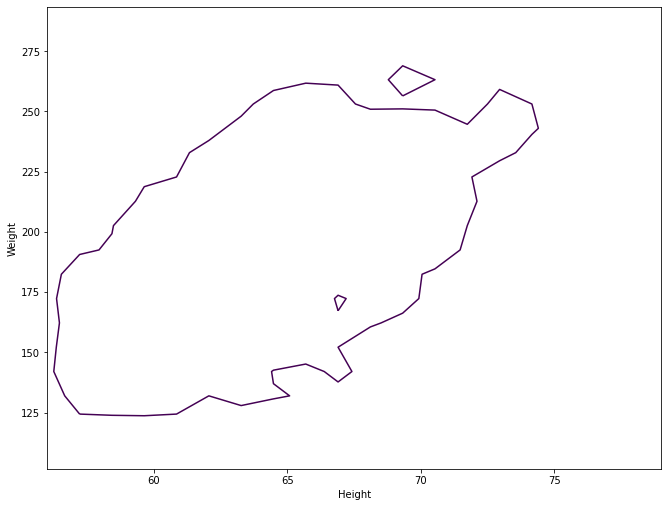

In [46]:
# Ask matplot lob to 
hist, x_edge, y_edge = np.histogram2d(df2["height"], df2["weight"], bins=20)
# Get bin centers
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

plt.figure(figsize=(11.0,8.5))
plt.contour(x_center, y_center, hist, levels=[10])
plt.xlabel('Height')
plt.ylabel('Weight');

#### Still not great.... Enter KDE Plots

# KDE Plots

/Users/afaan.naqvi/.pyenv/versions/3.7.3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


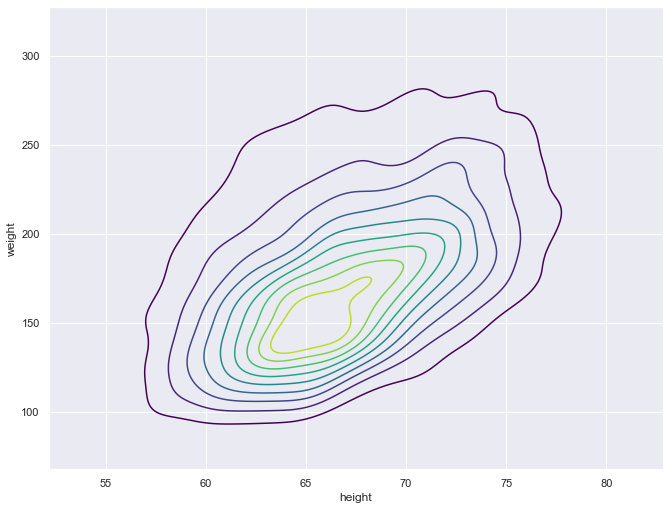

In [53]:
sb.set(rc={'figure.figsize':(11.0,8.5)})
sb.kdeplot(df2["height"], df2["weight"], cmap='viridis');

/Users/afaan.naqvi/.pyenv/versions/3.7.3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


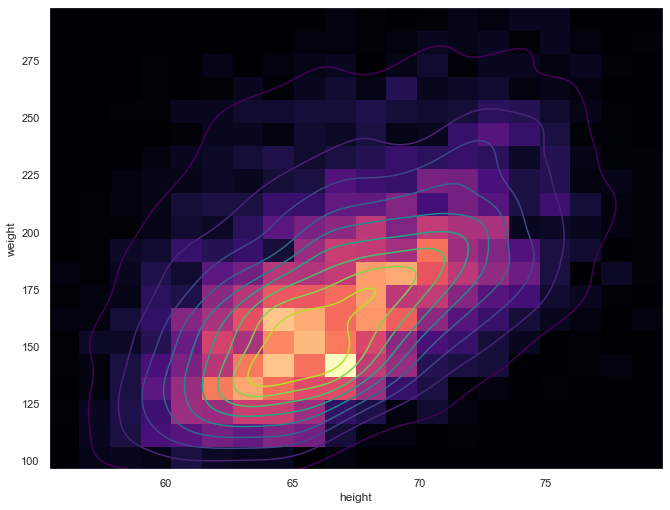

In [54]:
sb.set(rc={'figure.figsize':(11.0,8.5)})
sb.kdeplot(df2["height"], df2["weight"], cmap='viridis')
plt.hist2d(df2['height'], df2['weight'], bins=20, cmap='magma');

In [56]:
# This is smoother, as seaborn has smoothed the data with a Gaussian dist estimation

/Users/afaan.naqvi/.pyenv/versions/3.7.3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='height', ylabel='weight'>

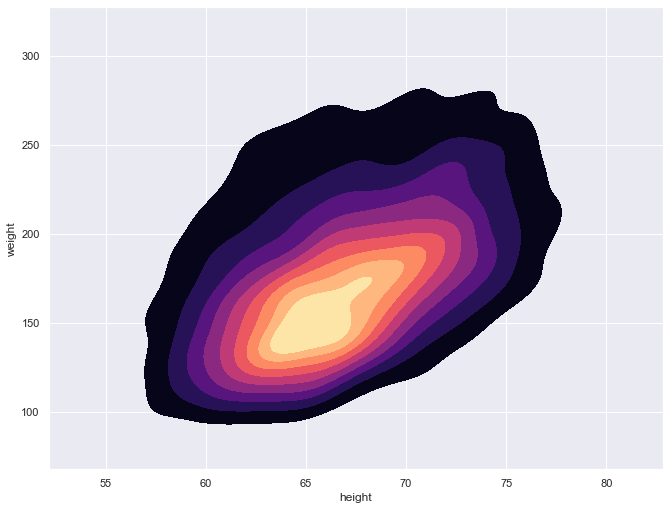

In [57]:
sb.set(rc={'figure.figsize':(11.0,8.5)})
sb.kdeplot(df2["height"], df2["weight"], cmap='magma', shade=True)

# In Defense of Simplicity

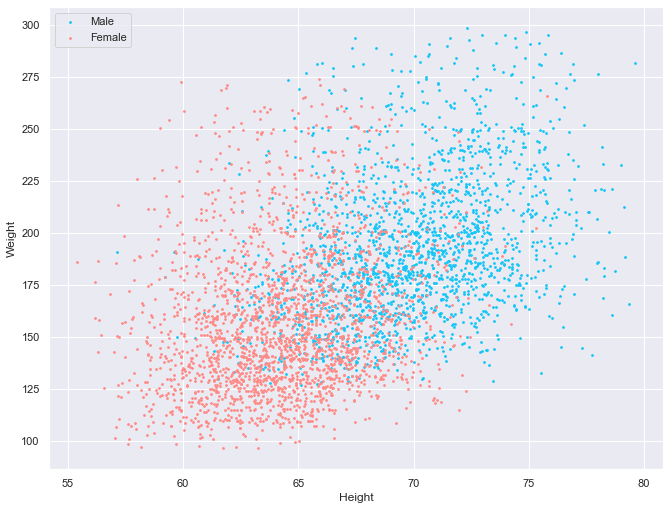

In [61]:
m = df2["sex"] == 1 # Boolean mask on gender
plt.figure(figsize=(11.0,8.5))
plt.scatter(df2.loc[m, "height"], df2.loc[m, "weight"], c="#16c6f7", s=3, label='Male')
plt.scatter(df2.loc[~m, "height"], df2.loc[~m, "weight"], c="#ff8b87", s=3, label='Female')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc=2);

# Treating Points with Probability
Using the library `ChainConsumer`

In [62]:
params = ["height", "weight"]
male = df2.loc[m, params].values
female = df2.loc[~m, params].values
male.shape

(1946, 2)

In [64]:
female.shape

(2285, 2)